In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
x_proba = tree_clf.predict_proba([[5, 1.5]])
x_hat = tree_clf.predict([[5, 1.5]])

x_proba, x_hat

(array([[0.        , 0.90740741, 0.09259259]]), array([1]))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def plot_clf(tree_clf, axes):
  x1s = np.linspace(axes[0], axes[1])
  x2s = np.linspace(axes[2], axes[3])

  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_hat = tree_clf.predict(X_new).reshape(x1.shape)
  plt.contourf(x1, x2, y_hat, alpha=0.3)


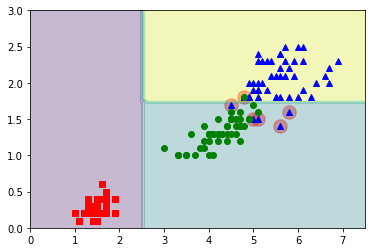

In [4]:
y_hat = tree_clf.predict(X).reshape(y.shape)
plt.plot(X[:,0][y==0], X[:,1][y==0], 'rs')
plt.plot(X[:,0][y==2], X[:,1][y==2], 'b^')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'go')
plt.scatter(X[:,0][y!=y_hat], X[:,1][y!=y_hat], s=180, c='red', alpha=0.4)
plot_clf(tree_clf, [0, 7.5, 0, 3])


In [12]:
tree_clf2 = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf2.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=40)

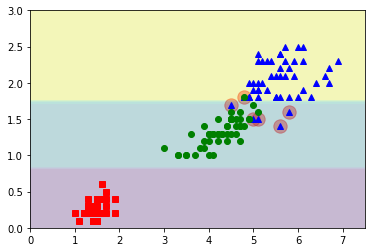

In [13]:
y_hat2 = tree_clf2.predict(X).reshape(y.shape)
plt.plot(X[:,0][y==0], X[:,1][y==0], 'rs')
plt.plot(X[:,0][y==2], X[:,1][y==2], 'b^')
plt.plot(X[:,0][y==1], X[:,1][y==1], 'go')
plt.scatter(X[:,0][y!=y_hat2], X[:,1][y!=y_hat2], s=180, c='red', alpha=0.4)
plot_clf(tree_clf2, [0, 7.5, 0, 3])

In [21]:
from sklearn.datasets import make_moons
X_moon, y_moon = make_moons(n_samples=100, random_state=53, noise=0.25) 

tree_clf_moon1 = DecisionTreeClassifier(random_state=42)
tree_clf_moon2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

tree_clf_moon1.fit(X_moon, y_moon)
tree_clf_moon2.fit(X_moon, y_moon)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

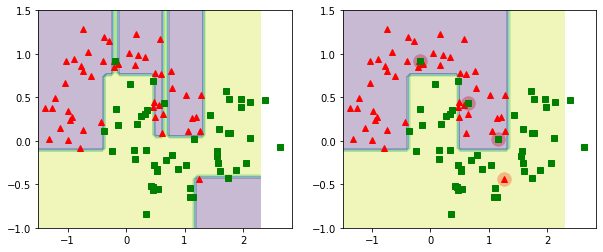

In [29]:
plt.figure(figsize=(10,4))

y_moon_hat1 = tree_clf_moon1.predict(X_moon)
y_moon_hat2 = tree_clf_moon2.predict(X_moon)

plt.subplot(121)
plt.plot(X_moon[:, 0][y_moon==0], X_moon[:, 1][y_moon==0], 'r^')
plt.plot(X_moon[:, 0][y_moon==1], X_moon[:, 1][y_moon==1], 'gs')
plt.scatter(X_moon[:, 0][y_moon!=y_moon_hat1], X_moon[:, 1][y_moon!=y_moon_hat1], facecolors='#FFAAAA')
plot_clf(tree_clf_moon1, [-1.5, 2.3, -1, 1.5])

plt.subplot(122)
plt.plot(X_moon[:, 0][y_moon==0], X_moon[:, 1][y_moon==0], 'r^')
plt.plot(X_moon[:, 0][y_moon==1], X_moon[:, 1][y_moon==1], 'gs')
plt.scatter(X_moon[:, 0][y_moon!=y_moon_hat2], X_moon[:, 1][y_moon!=y_moon_hat2], s=180, facecolors='#FFAAAA')
plot_clf(tree_clf_moon2, [-1.5, 2.3, -1, 1.5])

In [34]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

DecisionTreeClassifier(random_state=42)

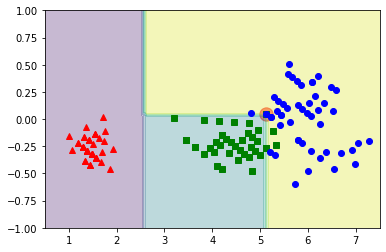

In [37]:
y_hat_r = tree_clf_r.predict(Xr)

plt.plot(Xr[:, 0][y==0], Xr[:, 1][y==0], 'r^')
plt.plot(Xr[:, 0][y==1], Xr[:, 1][y==1], 'gs')
plt.plot(Xr[:, 0][y==2], Xr[:, 1][y==2], 'bo')
plt.scatter(Xr[:, 0][y!=y_hat_r], Xr[:, 1][y!=y_hat_r],c='red', s=180, alpha=0.5)

plot_clf(tree_clf_r, [0.5, 7.5, -1.0, 1])